In [1]:
import pandas as pd
import numpy as np
import holoviews as hv
import hvplot

import maestro_file
from pathlib import Path

from bokeh.io import output_notebook
from bokeh.plotting import figure, show

output_notebook()

Loading BokehJS ...

In [2]:
file_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/4-11-2015/Ve041115.0351')
# file_path = Path('/Users/barak/Documents/Movement_Research/data_from_Mati/9-22-2014/Ve092214.0351')

with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)

print(data_file.blinks)

None


In [3]:
base_path = '/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/10-21-2014/'

# for file in Path(base_path).iterdir():
#     if file.is_file():
#         new_name = 'Ve'+file.name
#         # print(new_name)
#         file.rename(Path(base_path) / new_name)



In [4]:
base_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/')
dirs = [d for d in base_path.iterdir() if d.is_dir()]
len(dirs)

73

In [5]:
# dir_path = dirs[0]
files = []
for dir_path in dirs:
    files += list(f for f in dir_path.iterdir() if f.is_file())
len(files)

86417

In [57]:
# file_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/4-11-2015/Ve041115.0351')
# file_path = Path('/Users/barak/Documents/Movement_Research/data_from_Mati/9-22-2014/Ve09222014.0351')
file_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/9-24-2014/Ve092414.0248')
file_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/10-14-2014/Ve101414.1638')
# file_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/12-16-2014/Ve121614.0182')

with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)

data_file.trial.name
# int(data_file.trial.name[1:])
data_file.trial

# """
# Trial(name='v20d0', set_name=None, subset_name=None, 
# segments=[
#         <maestro_file.Trial.Segment object at 0x7a3c762cb910>,
#         <maestro_file.Trial.Segment object at 0x7a3c76302350>,
#         <maestro_file.Trial.Segment object at 0x7a3c76302b10>, 
#         <maestro_file.Trial.Segment object at 0x7a3c76302750>,
#         <maestro_file.Trial.Segment object at 0x7a3c76302710>
# ], 
# targets=[Target(hardware_type=29, name='fix', 
# definition=RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 17805478), 
# rgb_contrast=(9272576, 18006180), outer_w=0.30000001192092896, 
# outer_h=0.30000001192092896, inner_w=0.009999999776482582, inner_h=0.009999999776482582, 
# num_dots=9272576, dot_size=1, seed=18006180, percent_coherent=1,
#  noise_update_intv=9113376, noise_limit=9409920, dot_life=0.0, 
#  spatial_frequency=(2.475533867076222e-39, 2.2982795605582292e-38), 
#  drift_axis=(2.695417774826672e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.2993668929910584e-38), 
#  sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, 
#  flicker_off_dur=0, flicker_delay=0))], perts=[], sections=[], record_seg=0, 
#  skip_seg=-1, file_version=19, xy_seed=0, 
#  global_transform=TargetTransform(pos_offsetH_deg=0.0, pos_offsetV_deg=0.0, pos_scale=1.0, pos_rotate_deg=0.0, 
#  vel_scale=1.0, vel_rotate_deg=0.0))
# """

Trial(name='d90', set_name=None, subset_name=None, segments=[<maestro_file.Trial.Segment object at 0x7a3c7465af10>, <maestro_file.Trial.Segment object at 0x7a3c76333090>, <maestro_file.Trial.Segment object at 0x7a3c76333850>, <maestro_file.Trial.Segment object at 0x7a3c76332d90>, <maestro_file.Trial.Segment object at 0x7a3c76332dd0>, <maestro_file.Trial.Segment object at 0x7a3c762fa450>], targets=[Target(hardware_type=29, name='fix', definition=RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 18854054), rgb_contrast=(9538064, 19054756), outer_w=0.5, outer_h=0.5, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=9538064, dot_size=1, seed=19054756, percent_coherent=1, noise_update_intv=9375520, noise_limit=13031640, dot_life=0.0, spatial_frequency=(4.12895395110236e-39, 2.539444007177455e-38), drift_axis=(2.989291362532244e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.336569685660725e-38), sigma=(0.0, 0.0), media_folder='', media_file='', flick

In [61]:
data_file.trial.targets[0].definition
# """
# Target(hardware_type=29, name='fix', 
# definition=RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 18198694), rgb_contrast=(12811536, 18399396), outer_w=0.30000001192092896, outer_h=0.30000001192092896, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=12811536, dot_size=1, seed=18399396, percent_coherent=1, noise_update_intv=12652320, noise_limit=12569160, dot_life=0.0, spatial_frequency=(4.311100330689157e-39, 2.355773014861473e-38), drift_axis=(2.8056203702162614e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.795280814321754e-38), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0))
# """

RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 18854054), rgb_contrast=(9538064, 19054756), outer_w=0.5, outer_h=0.5, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=9538064, dot_size=1, seed=19054756, percent_coherent=1, noise_update_intv=9375520, noise_limit=13031640, dot_life=0.0, spatial_frequency=(4.12895395110236e-39, 2.539444007177455e-38), drift_axis=(2.989291362532244e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.336569685660725e-38), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0)

In [ ]:
import re

def get_file_data(file_path: Path) -> dict:
    posNormalizer = 40
    velNormalizer = 10.8826
    with open(file_path, 'rb') as f:
        data_file = maestro_file.DataFile.load(f.read(), file_path.name)

    if not re.match(r'^d\d+$', data_file.trial.name):
        return {}
    
    trail_row = {
        'filename_name': data_file.file_name,
        'trail_session': data_file.file_name.split('.')[0],
        'trail_number': data_file.file_name.split('.')[1],
        'trial_name': data_file.trial.name,
        'hPos': np.array(data_file.ai_data[0]) / posNormalizer,
        'vPos': np.array(data_file.ai_data[1]) / posNormalizer,
        'hVel': np.array(data_file.ai_data[2]) / velNormalizer,
        'vVel': np.array(data_file.ai_data[3]) / velNormalizer,
        'motion_onset': 1000,
        'cue_onset': 1000,
        'trial_length': len(data_file.ai_data[0]),
        'dir': int(data_file.trial.name[1:]),
        'blinks': data_file.blinks,
        
    }
    return trail_row

# 'spike_times','saccades', 'fail', 'idx', 'cell_id',
# 'motion_onset', 'cue_onset',
# 'dir_change', 'screen_rotation', 'task',
# 'first_relevant_saccade', 'max_relevant_interval'
# 'speed', 'posProjection', 'velProjection'

    
test_data = get_file_data(file_path)
test_data

{}

In [8]:
vernon_data_xlsx_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Data.xlsx')
vernon_data = pd.read_excel(vernon_data_xlsx_path)
# vernon_data.apply(lambda row: row['Saccade_Tuning'], axis=1)
vernon_data = vernon_data[~pd.isna(vernon_data['Saccade_Tuning'])]
vernon_data['Date'] = pd.to_datetime(vernon_data['Date'], format='%m-%d-%Y')
base_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/')

def row_to_files_list(row, base_path: Path) -> list:
    start, end = np.array(row['Saccade_Tuning'].split(':'), dtype=int)
    date = row['Date']
    dir_by_date = base_path.joinpath(date.strftime('%-m-%-d-%Y'))
    # print(dir_by_date)
    formatted_date = date.strftime('%m%d%y')
    files_list = [f'Ve{formatted_date}.{i:04d}' for i in range(start, end + 1)]
    # print(len(files_list))
    return [dir_by_date.joinpath(f) for f in files_list]

# row_to_files_list(vernon_data.iloc[0], base_path)
files_lst = vernon_data.apply(lambda row: row_to_files_list(row, base_path), axis=1)
# files_lst = vernon_data.apply(lambda row: row_to_files_list(row, base_path), axis=1)
files_lst.apply(lambda x: len(x)).sum()
# files_lst

np.int64(4881)

In [21]:
files_df = pd.DataFrame(columns=test_data.keys())
# for sessions_list in files_lst.iloc[:]:
for file in files:
    try:
        file_data = get_file_data(file)
        if file_data == {}:
            continue
        else:
            files_df = pd.concat([files_df, pd.DataFrame([file_data])], ignore_index=True)
    except Exception as e:
        print(f'Error processing file {file}: {e}')
        # raise e
files_df

Error processing file /home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/10-20-2014/.DS_Store: Maestro data file size in bytes (6148) is not a multiple of 1024!
Error processing file /home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/8-26-2015/Archive.zip: Maestro data file size in bytes (1368086) is not a multiple of 1024!
Error processing file /home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/9-22-2014/.DS_Store: Maestro data file size in bytes (6148) is not a multiple of 1024!
Error processing file /home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/4-7-2015/savethis.m: Maestro data file size in bytes (877) is not a multiple of 1024!
Error processing file /home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/4-7-2015/.DS_Store: Maestro data file size in bytes (6148) is not a multiple of 1024!
Error processing file /home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/4-7-2015/untitled.fig: Maestro data file size

,filename_name,trail_session,trail_number,trial_name,hPos,vPos,hVel,vVel,motion_onset,cue_onset,trial_length,dir,blinks
0,Ve110414.1269,Ve110414,1269,d90,"[0.325, 0.35, 0.35, 0.35, 0.325, 0.35, 0.35, 0...","[0.975, 0.975, 0.975, 0.975, 0.975, 0.975, 0.9...","[0.4594490287247533, 0.36755922297980265, 0.45...","[-0.18377961148990132, -0.18377961148990132, -...",1000,1000,2161,90,None
1,Ve110414.1257,Ve110414,1257,d0,"[-0.025, -0.025, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-4.0, -4.025, -4.0, -4.025, -4.025, -4.0, -4....","[5.880947567676842, 5.7890577619318915, 5.6052...","[-1.1945674746843584, -1.286457280429309, -1.1...",1000,1000,2161,0,None
2,Ve110414.0116,Ve110414,0116,d135,"[10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10.7, 10....","[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...","[0.0, 0.0, 0.18377961148990132, 0.275669417234...","[-0.7351184459596053, -0.8270082517045559, -0....",1000,1000,2161,135,None
3,Ve110414.1235,Ve110414,1235,d180,"[6.35, 6.375, 6.4, 6.425, 6.45, 6.525, 6.55, 6...","[6.625, 6.55, 6.425, 6.275, 6.1, 5.9, 5.675, 5...","[9.005200963005164, 9.097090768750116, 9.28087...","[-13.048352415782993, -19.113079594949735, -27...",1000,1000,2161,180,None
4,Ve110414.0137,Ve110414,0137,d180,"[10.25, 10.25, 10.275, 10.25, 10.25, 10.25, 10...","[-0.15, -0.15, -0.15, -0.15, -0.15, -0.15, -0....","[-0.09188980574495066, -0.09188980574495066, 0...","[0.0, 0.09188980574495066, 0.18377961148990132...",1000,1000,2161,180,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12824,Ve092414.1202,Ve092414,1202,d225,"[2.5, 2.45, 2.4, 2.35, 2.275, 2.2, 2.15, 2.075...","[-1.125, -1.1, -1.075, -1.075, -1.05, -1.025, ...","[-59.26892470549317, -57.79868781357396, -56.9...","[27.10749269476044, 26.004815025821035, 24.810...",1000,1000,2161,225,None
12825,Ve092414.0784,Ve092414,0784,d180,"[2.3, 2.3, 2.325, 2.3, 2.3, 2.325, 2.3, 2.325,...","[-0.9, -0.9, -0.925, -0.925, -0.925, -0.925, -...","[3.767482035542977, 3.5837024240530755, 3.3999...","[-1.8377961148990132, -1.7459063091540625, -1....",1000,1000,2161,180,None
12826,Ve092414.1121,Ve092414,1121,d315,"[8.9, 8.9, 8.9, 8.9, 8.875, 8.9, 8.9, 8.875, 8...","[0.225, 0.225, 0.225, 0.225, 0.225, 0.2, 0.225...","[1.7459063091540625, 1.7459063091540625, 2.021...","[-0.5513388344697039, -0.5513388344697039, -0....",1000,1000,2161,315,None
12827,Ve092414.1218,Ve092414,1218,d45,"[0.175, -0.15, -0.5, -0.875, -1.225, -1.6, -2....","[-2.6, -2.375, -2.15, -1.95, -1.725, -1.5, -1....","[-173.48795324646684, -173.85551246944664, -17...","[183.87150129564625, 186.62819546799477, 188.0...",1000,1000,2161,45,None


In [ ]:
# files_df.to_pickle('/home/barak/data/ComDePri-EWS/pickles/vernon_data.pkl')

In [12]:
base_path = Path('/home/barak/data/ComDePri-EWS/data/data_from_Mati/Vernon_Neural/4-11-2015')
files_list = ['0351', '0352', '0359']

files_df = pd.DataFrame(columns=test_data.keys())

for file in files_list:
    file_path = base_path / f'Ve041115.{file}'
    file_data = get_file_data(file_path)
    print(file_data)
    files_df = pd.concat([files_df, pd.DataFrame([file_data])], ignore_index=True)

files_df

{'filename_name': 'Ve041115.0351', 'trail_session': 'Ve041115', 'trail_number': '0351', 'trial_name': 'd315', 'hPos': array([-2.625, -2.625, -2.625, ...,  7.9  ,  7.9  ,  7.9  ]), 'vPos': array([-10.375, -10.375, -10.375, ...,  -7.025,  -7.025,  -7.025]), 'hVel': array([0.36755922, 0.36755922, 0.45944903, ..., 0.45944903, 0.18377961,
       0.        ]), 'vVel': array([-0.91889806, -0.73511845, -0.64322864, ...,  0.45944903,
        0.45944903,  0.36755922]), 'motion_onset': 1000, 'cue_onset': 1000, 'trial_length': 2161, 'dir': 315, 'blinks': None}
{'filename_name': 'Ve041115.0352', 'trail_session': 'Ve041115', 'trail_number': '0352', 'trial_name': 'd0', 'hPos': array([-5.325, -5.325, -5.35 , ...,  9.85 ,  9.875,  9.85 ]), 'vPos': array([0.875, 0.875, 0.875, ..., 0.9  , 0.9  , 0.925]), 'hVel': array([2.48102476, 2.38913495, 2.11346553, ..., 0.45944903, 0.91889806,
       1.01078786]), 'vVel': array([-0.45944903, -0.55133883, -0.64322864, ...,  0.        ,
        0.        ,  0.       

,filename_name,trail_session,trail_number,trial_name,hPos,vPos,hVel,vVel,motion_onset,cue_onset,trial_length,dir,blinks
0,Ve041115.0351,Ve041115,0351,d315,"[-2.625, -2.625, -2.625, -2.65, -2.625, -2.65,...","[-10.375, -10.375, -10.375, -10.375, -10.375, ...","[0.36755922297980265, 0.36755922297980265, 0.4...","[-0.9188980574495066, -0.7351184459596053, -0....",1000,1000,2161,315,None
1,Ve041115.0352,Ve041115,0352,d0,"[-5.325, -5.325, -5.35, -5.35, -5.35, -5.35, -...","[0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8...","[2.4810247551136677, 2.389134949368717, 2.1134...","[-0.4594490287247533, -0.5513388344697039, -0....",1000,1000,2161,0,None
2,Ve041115.0359,Ve041115,0359,d90,"[6.75, 6.75, 6.75, 6.725, 6.75, 6.75, 6.725, 6...","[8.05, 8.05, 8.05, 8.05, 8.05, 8.05, 8.05, 8.0...","[0.0, -0.36755922297980265, -0.551338834469703...","[0.0, 0.36755922297980265, 0.5513388344697039,...",1000,1000,2161,90,None


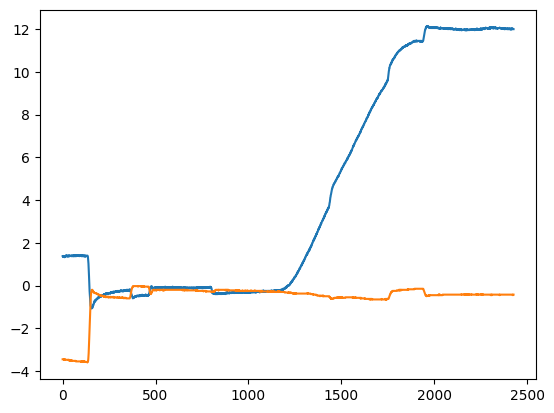

In [13]:
import matplotlib.pyplot as plt
plt.plot(np.array([data_file.ai_data[i] for i in [0,1]]).T / 40)
# 0 & 1 are the hor and ver eye data, 2 and 3 are the hor and ver eye velocity. pos normalizer - 40, vel normalizer - 10.8826


In [14]:
(data_file.trial)

Trial(name='v20d0', set_name=None, subset_name=None, segments=[<maestro_file.Trial.Segment object at 0x7f8b6ddfbf90>, <maestro_file.Trial.Segment object at 0x7f8b6ddd4250>, <maestro_file.Trial.Segment object at 0x7f8b6d007310>, <maestro_file.Trial.Segment object at 0x7f8b6d007690>, <maestro_file.Trial.Segment object at 0x7f8b6d007a10>], targets=[Target(hardware_type=29, name='fix', definition=RMVideoTarget(type=4, aperture=1, flags=-381712, rgb_mean=(16777215, 17805478), rgb_contrast=(9272576, 18006180), outer_w=0.30000001192092896, outer_h=0.30000001192092896, inner_w=0.009999999776482582, inner_h=0.009999999776482582, num_dots=9272576, dot_size=1, seed=18006180, percent_coherent=1, noise_update_intv=9113376, noise_limit=9409920, dot_life=0.0, spatial_frequency=(2.475533867076222e-39, 2.2982795605582292e-38), drift_axis=(2.695417774826672e-38, 0.0), spatial_phase=(9.528829557408756e-44, 1.2993668929910584e-38), sigma=(0.0, 0.0), media_folder='', media_file='', flicker_on_dur=0, flicke

In [15]:
# Trial(
#     name='d315', set_name=None, subset_name=None, 
#     segments=[
#         <maestro_file.Trial.Segment object at 0x169d286d0>, 
#         <maestro_file.Trial.Segment object at 0x169d28550>, 
#         <maestro_file.Trial.Segment object at 0x169d28810>, 
#         <maestro_file.Trial.Segment object at 0x169d28b10>, 
#         <maestro_file.Trial.Segment object at 0x169d28c90>, 
#         <maestro_file.Trial.Segment object at 0x169d28e90>
#     ], 
#     targets=[
#         Target(
#             hardware_type=29, name='fix', 
#             definition=RMVideoTarget(
#                 type=4, aperture=1, flags=-381712, 
#                 rgb_mean=(16777215, 4108454), 
#                 rgb_contrast=(28547800, 4309156), 
#                 outer_w=0.5, outer_h=0.5, 
#                 inner_w=0.009999999776482582, 
#                 inner_h=0.009999999776482582, 
#                 num_dots=28547800, dot_size=1, seed=4309156, 
#                 percent_coherent=1, noise_update_intv=28380960, 
#                 noise_limit=29939904, dot_life=0.0, 
#                 spatial_frequency=(3.210150574013864e-39, 3.7891769085621286e-39), 
#                 drift_axis=(6.038413685336071e-39, 0.0), 
#                 spatial_phase=(9.528829557408756e-44, 6.597649481672677e-38), 
#                 sigma=(0.0, 0.0), 
#                 media_folder='', media_file='', 
#                 flicker_on_dur=0, flicker_off_dur=0, flicker_delay=0
#             )
#         )
#     ], 
#     perts=[], sections=[TaggedSection(start_seg=2, end_seg=3, label='d315')], 
#     record_seg=0, skip_seg=-1, file_version=19, xy_seed=0, 
#     global_transform=TargetTransform(pos_offsetH_deg=0.0, pos_offsetV_deg=0.0, pos_scale=1.0, pos_rotate_deg=0.0, vel_scale=1.0, vel_rotate_deg=0.0)
# )


In [16]:
print([str(p) for p in data_file.trial.segments[2].tgt_pos])

['(-3.5, 0)']


In [17]:
data_file.trial.segments[2].tgt_on

[True]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
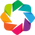

[array([[ 0. ,  0. ],
       [ 0. ,  0. ],
       [ 0. ,  0. ],
       ...,
       [12.5,  0. ],
       [12.5,  0. ],
       [12.5,  0. ]])]


:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)

In [18]:
hv.extension('bokeh')
tgt_trjs = data_file.trial.target_trajectories()
print((tgt_trjs))
p = hv.Curve(tgt_trjs[0][:, 0]) * hv.Curve(tgt_trjs[0][:, 1]).opts(width=800, height=400, tools=['hover'])
# p = hv.Path([tgt_trjs[0]]).opts(width=800, height=400, tools=['hover'], color='red', line_dash='dotted')
p

In [19]:
first = tgt_trjs[0][0]
last = tgt_trjs[0][-1]

p *= hv.Path(tgt_trjs[0][[0, -1],:]).opts(color='blue')
p


:Overlay
   .Curve.I  :Curve   [x]   (y)
   .Curve.II :Curve   [x]   (y)
   .Path.I   :Path   [x,y]

In [20]:
[len(data_file.ai_data[key]) for key in data_file.ai_data.keys()]
data_file.header

DataFileHeader(trial_name='v20d0', num_ai_channels=10, channel_list=(0, 1, 2, 3, 4, 5, 6, 8, 9, 11, 0, 0, 0, 0, 0, 0), display_height_pix=1440, display_width_pix=2304, display_distance_mm=300, display_width_mm=480, display_height_mm=310, display_framerate_hz=80.083, pos_scale=1.0, pos_theta=0.0, vel_scale=1.0, vel_theta=0.0, reward_len1_ms=10, reward_len2_ms=10, date_recorded=datetime.date(2014, 12, 16), version=19, flags=142, num_bytes_compressed=24359, num_scans_saved=2428, num_spike_bytes_compressed=61034, spike_sample_intv_us=40, xy_random_seed=0, rp_distro_start=0, rp_distro_dur=0, rp_distro_response=0, rp_distro_windows=(0, 0, 0, 0), rp_distro_response_type=0, horizontal_start_pos=0.0, vertical_start_pos=0.0, trial_flags=1, search_target_selected=0, velocity_stab_window_len_ms=1, eyelink_info=(0, 0, 0, 0, 0, 0, 0, 0, 0), trial_set_name='', trial_subset_name='', rmvideo_sync_size_mm=0, rmvideo_sync_dur_frames=0, timestamp_ms=0, rmvideo_duplicate_events=(0, 0, 0, 0, 0, 0))